# Setup

1. Install Tesseract (https://github.com/UB-Mannheim/tesseract/wiki)
2. Add Tesseract-OCR installation folder to PATH
3. pip install pytesseract (https://pypi.org/project/pytesseract/)
4. Set tesseract path (See Below Code)

In [15]:
import pytesseract
import openai

import cv2
import matplotlib.pyplot as plt
import os
import dotenv
import requests

# Set Tesseract Path (Change This)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [16]:
dotenv.load_dotenv()
openai.api_key = os.getenv("OPEN_API_KEY")

### Text Detection

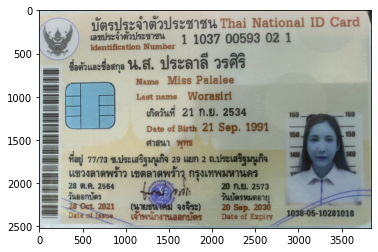

In [22]:
# Import the image file
image = cv2.imread("image/Thai ID Sample.jpg")
plt.imshow(image)

# We will use the ID found here as sample: 
# https://www.reddit.com/user/palalee-worasiri-/comments/wncyid/thai_national_id_card_of_a_scammer_palalee/

In [23]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

# Recognize the text in the image
text = pytesseract.image_to_string(thresh, lang="tha+eng")

# Print the text
print(text)

IM น | ill a A

บัตรประจําตัวประชาชน Thai National ID Card ก
เลขประจําตัวประชาชน 1 1037 00593 02 1

Identification Number

: ชื่อตัวและชื่อสกุล น.ส. ประลาลิ วรศิริ

Name Miss Palalee
Last name Worasiri
เกิดวันที่ 21 7.8. 2534
Date of Birth 21 Sep. 1991
ศาสนา พุทธ             1
fj 77กจ ชระเริฐมบูิจ 23 แยก 2 ฉประเสิตญิด *
แขวงลาดพร้าว เขตลาดพรัา   , กรุงเทพมพรแต

28 A.A. 2564

วันออกบัตร
ปล16 อ์โรธง๑




### Text Processing

In [24]:
prompt = (text + "Summarize the text above in english and in the same formatting.")
response = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": prompt}], temperature=0)

In [25]:
print(response["choices"][0]["message"]["content"])
print("Tokens Used: " + str(response["usage"]["total_tokens"]))

Thai National ID Card
Identification Number: 1 1037 00593 02 1
Name: Miss Palalee Worasiri
Date of Birth: 21 Sep. 1991
Religion: Buddhist
Address: 77/2 Chorakhe Bua Road, Ladprao Subdistrict, Ladprao District, Bangkok
Date of Issuance: 16 Oct. 2021
Tokens Used: 392


In [28]:
prompt = (text + "Who is this person and how old is this person in 2023?")
response = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": prompt}], temperature=0)
print(response["choices"][0]["message"]["content"])
print("Tokens Used: " + str(response["usage"]["total_tokens"]))

This person's name is Miss Palalee Worasiri and she was born on September 21, 1991. In 2023, she will be 32 years old.
Tokens Used: 343
